# Using Neural Nets and Stochastic Gradient Descent

- ML can be boiled down to just two basic choices ->
## 1. Ensemble of Decision Trees(Random forests, Gradient Boosting, etc.), mainly for structured data(like a database table in most companies).
## 2. Multi - Layered neural networks using SGD(Stochastic Gradient Descent), for unstructured data.(natural language, image data, audio signals, etc.)


#  MNIST as an example to start with Neural Nets 


- It is a collection set of hand-written digits available on deeplearning.net.
- Its applications are found in cheque recognition in banks and address and zipcode identification in letters and mails.

# MNIST DATA
<img src="images/mnist.png" alt="" style="width: 50%"/>

- A matrix can represent an image, by creating a grid where each entry corresponds to a different pixel.
- Each pixel is **associated with a number**, the **higher the number of the pixel, the darker the shade.**
- **255** means the **darkest value** and **0** is the lighest cell.

<img src="digit.gif" alt="digit" style="width: 45%"/>
  (Source: [Adam Geitgey](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721))


In [2]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

- Importing all the imports.

In [3]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *
from fastai.metrics import *

In [4]:
import os
path = 'tmp/mnist'

- <font size =3> Pickle is a data format which is used to basically save any kind of **python object** </font>

In [5]:
URL = 'http://deeplearning.net/data/mnist/'
File = 'mnist.pkl.gz'
# pkl is a PICKLE FORMAT FILE

- load_mnist is a function which is used for the loading of the data. 
- Pickle is a format from python 2 and thus we explicitly have to provide encoding.
- Pickle files are only exclusive of Python and you can always **pickle** your python objects.

In [6]:
def load_mnist(file):
    return pickle.load(gzip.open(file,'rb'),encoding='latin-1')

In [20]:
get_data(URL+File,path+File)

mnist.pkl.gz: 16.2MB [00:02, 6.10MB/s]                            


## Destructuring data
- load_mnist gives back a tuple of training, validation and test data.
- So we assign these tuples to the values x,y,x_valid,y_valid, and to **_** .
- _ is a variable used for throwing out data we don't need.
- **Don't call get_data repeatedly**. 
- Just start kernel with the load_mnist cell

In [7]:
((x,y),(x_valid,y_valid),_) = load_mnist(path+File)

- <font size =4> training data consists of **rows of size 784 and 50k rows**</font>
- This is because they took **each of the IMAGE and concatenated each row one by one to the first row and then gave us the data**
- So instead of a **Cube consisting of Matrix Slices we get a matrix with row elements.**

In [8]:
type(x),x.shape

(numpy.ndarray, (50000, 784))

In [9]:
type(y), y.shape

(numpy.ndarray, (50000,))

In [10]:
type(_)

tuple

In [11]:
p=[]
for k in x[0]:
    if(k==0):
        p.append(int(k))
    else:
        p.append(k)
p = np.array(p)

In [12]:
import seaborn as sns

In [13]:
cx=[]
cy=[]
for i in range(28):
    for k in range(28):
        cx.append(i)
        cy.append(k)


## Plotting Figures

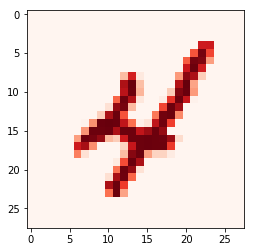

In [14]:
plt.imshow(x[9].reshape(28,28),cmap = 'Reds')

In [15]:
x[9].shape

(784,)

## My way to plot

Enter index : 981


Text(0.5, 1.0, '7')

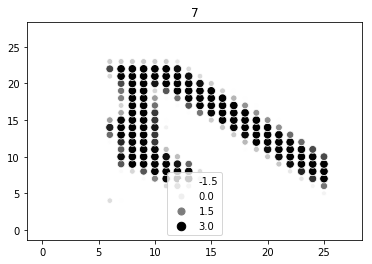

In [18]:
i = int(input("Enter index :"))
sns.scatterplot(cx,cy,size = x[i],hue = x[i],palette = 'Greys')
plt.title(y[i])

## ROWS
- Deeplearning - axis 0
- Maths - Dim 0

## Columns
- Deeplearning - axis 1
- Maths - Dim 1
## For image processing people or python image library columns are axis 1 and rows are axis 2
- It returns **column x rows** for python imaging library and everything else is **rows x columns**

## Normalize 
- Deep learning algorithms are really affected by the scale of the data and thus we should **normalize the data** that we have.
- In this the **std. deviation becomes 1** and **mean close to 0.** 

In [16]:
mean = x.mean()
std = x.std()

### What are the means and standard deviations of?
- They are the mean and std of **blackness of the pixel**

In [17]:
x = (x-mean)/std
mean, std, x.mean(), x.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

- The above code shows the fact that normalization does make the mean close to zero and standard deviation close to 1 although not perfectly.

- Note that for *CONSISTENCY*, we subtract the **mean and standard deviation of training set only** from our **validation set.**
- A number needs to **have the same meaning in all the data sets training,test and validation** 

In [18]:
x_valid = (x_valid-mean)/std
x_valid.mean(),x_valid.std()

(-0.005850922, 0.99243325)

# Look at the data
- Already Jeremy told that our data was compressed into a single row instead of a matrix but in actual data sets that you get is going to be compressed in some kind and thus you need to **look at the data**

# Now we need to reshape our data.
- We use np.reshape builtin function to reshape our array into images of 28x28 pixel size. 
- One important thing to note is that this reshape function has three sub-parameters in the size parameter.
- The *first* one is the **number of distinct objects in your data** or you know you can leave it as -1 so that numpy figures out what dimensions are required so that the data may fit.
- The second and third are the size of **each distinct object**

In [19]:
x_images = np.reshape(x_valid,(-1,28,28))
x_images.shape

(10000, 28, 28)

In [20]:
def show(image,title = None):
    plt.imshow(image, cmap = "magma_r",alpha=0.8)
    if title is not None:
        plt.title(title, fontsize = 20)

# A cool function to plot grids

In [21]:
def plots(imgs,titles,rows = 3,figsize = (12,6)):
    f = plt.figure(figsize=figsize)
    col = len(imgs)//rows
    for i in range(len(imgs)):
        sp = f.add_subplot(rows,col,1+i)# i+1 is the plot number i+1
        # add_subplot is just a way t add the sub plot
        # (rows,col) is the size of my figure
        # in that I am adding plot (i+1)
        if titles[i] is not None:
            plt.title(titles[i],fontsize = 18)
        sp.axis('Off')
        sp.imshow(imgs[i],cmap = 'magma_r')
        

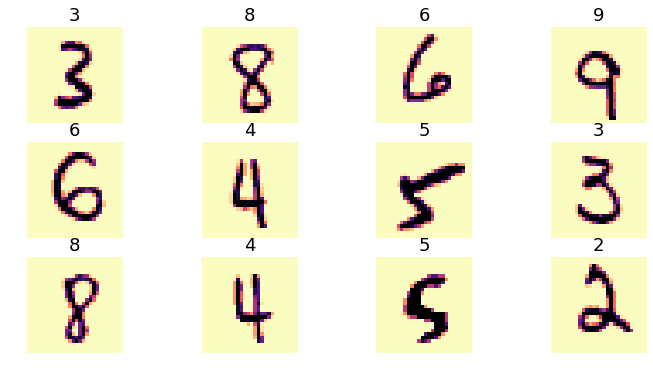

In [22]:
plots(x_images[:12],titles = y_valid[:12])

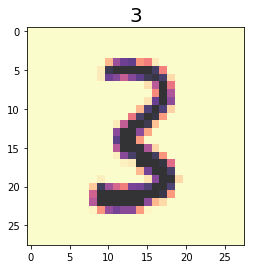

In [28]:
show(x_images[0],y_valid[0])

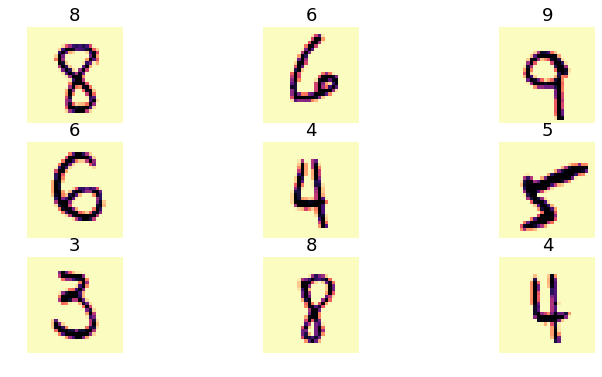

In [30]:
plots(x_images[1:10],y_valid[1:10])

# Extracting parts of Images.
- The below code shows that you want to ->
    - Go into the First image
    - Take **rows [12,17) and columns [12,17)**
    - Output just those cells for first image

In [141]:
(x_images[0,12:17,12:17])

array([[ 1.20261,  2.77889,  2.80432,  2.5755 ,  0.08396],
       [ 2.80432,  2.80432,  1.73651,  0.31278, -0.42452],
       [ 2.80432,  2.80432,  0.40176, -0.42452, -0.42452],
       [ 2.80432,  2.80432,  2.76618,  1.43143, -0.09401],
       [ 1.77465,  2.42296,  2.80432,  2.80432,  2.49923]], dtype=float32)

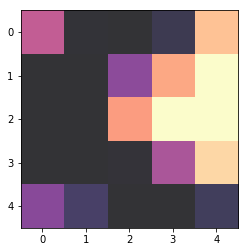

In [140]:
show(x_images[0,12:17,12:17])

# NEURAL NETS 


- They are basically CLASS of FUNCTIONS which can approximate functions **arbitrarily closely**
- The functions like **ax + b** or **ax^2 + bx + c + sin(d)** can only represent a **narrow class of functions**
- Neural Nets are infinitely flexible and can , in theory, represent **any class of functions arbitrarily closely provided we have a big enough net.**

- Neural nets have **parameters**.
- What we want is to figure out do I need to increase or decrease the parameter values.
- We do this by taking the derivative of the function wrt **parameters** and looks how it changes if we change the value of the parameter.
- Neural  nets are basically **linear layer followed by an activation followed by a linear and so on...**

In [42]:
from fastai.imports import *
from fastai.dataset import *
from fastai.model import *
from fastai.metrics import *

# We use PyTorch
- This a library kind of like numpy but allows GPU calculations for stuff with linear algebra(matrix multiplication)
- The neural network functionality of PyTorch is built on top of the Numpy-like functionality for fast matrix computations on a GPU.
- PyTorch uses the **CUDA framework by nvidia.**
- The **.cuda()** extension is used to make the GPU do the computation that we want to do
.
- Note-> PyTorch is going to take the derivative of the parameters and the functions by itself, you don't have to write it explicitly.

In [43]:
import torch.nn as nn


- nn is the Neural Net library.
- nn.Sequential means that we are **providing a sequence of layers to our neural net**
- Note that **input layer doesn't have to be explicitly mentioned in the parameters**
- We have a Linear Layer(28x28,10) - 28x28 means the size of the **individual image** 


In [92]:
net = nn.Sequential(
        nn.Linear(28*28,10), # 10 is to be given at the ending layer
        # BECAUSE THE LAST LAYER IS THE OUTPUT
        nn.LogSoftmax()
).cuda()

# .cuda is important to use at the end so that our computations are 
# done on the GPU

# We are using abstraction right now, 
- Jeremy just said that look at a NEURAL NET like a thing which takes as input a vector, does a matrix product of the vector(what the matrix is we'll define later), do a non-linearity and then we are going to put that through another mat. mul until we **end up with the vector we want**.

- **ReLU(Non - Linearity)**-> It is just throwing away the negative values we get from our matrix multiply(why -> we'll get to later).

- **LogSoftmax** is also a non-linearity function
- We use the output of the FINAL LAYER to generate our predictions. Often or classification problems, final layer has the same number of outputs as there are classes. In this case the number of distinct outputs are **10**: one for each digit.

- These outputs can be converted to **probabilities** and the **output corresponding to the highest probability for the image is that image's label.**


In [93]:
x.shape

(50000, 784)

In [94]:
md = ImageClassifierData.from_arrays(path, (x,y), (x_valid,y_valid))

In [95]:
loss= nn.NLLLoss()
metric = [accuracy] # accuracy is defined in fastai.metrics
opt = optim.Adam(net.parameters())

# Loss function - Negative Log Likelihood Loss
- I understood it nicely I think
- It just basically is **mean(-(y*(log(p)) + (1-y)*log(1-p)))**
- Explanation is pdf .
- Let us define it ourselves.


In [96]:
def cross_entropy(preds,prob):
    loss = 0
    for i,k in zip(preds,prob):
        if(i==1):
            loss = loss - np.log(k)
        else:
            loss = loss - np.log(1-k)
    return (loss/len(preds))

# Example 

In [97]:
preds = [1,0,0,1]
prob = [0.9,0.1,0.2,0.97]
cross_entropy(preds,prob)

0.11608094752864272

<font size = 4> - As the probabilities get **closer to one**, the loss gets **closer to zero.**</font>

# Parameters of Fit 
- Fitting is the process by which the net **learns the best parameters** 
- **net** is your Neural Net that you made
- **crit** is just the **LOSS FUNCTION WHICH YOU WANT TO USE**
- **metrics** is the metric you want to calculate for your neural net.
- **opt** is the **Optimization function for your neural net**
- **epochs** means **how many times each image goes through the neural net for prediction**

In [98]:
fit(net,md,n_epochs=5,crit = loss,metrics = metric,opt = opt)

epoch      trn_loss   val_loss   accuracy   
    0      0.329521   0.294247   0.9142    
    1      0.296606   0.277352   0.9223    
    2      0.283065   0.263894   0.9271    
    3      0.275924   0.262728   0.9282    
    4      0.290242   0.274927   0.9238    



[array([0.27493]), 0.9238]

- The **predict** function parameters have a certain detail attached.
- The second parameter for the **data has to be IMAGE CLASSIFIER INSTANCE** that you used to wrap up training and validation data in the variable **md**
- So, validation data is **not x_valid** but it is **md.val_d**

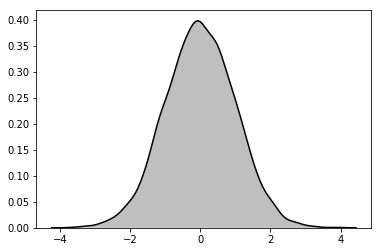

# cuda is Fast

In [185]:
%time 
torch.std(torch.randn(784,10).cuda())

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 8.34 µs


0.9922018647193909

In [186]:
%time
torch.std(torch.randn(784,10))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs


1.0018009949504516

In [124]:
preds = predict(net,md.val_dl)

In [55]:
preds.shape

(10000, 10)

- Prediction shape is 10000. **WHY?**
- This is because for each image(row) we have predictions corresponding to **each number** i.e. what is the probability that it is a 1, a 2, a 3, ...
- Now, the prediction for our row/image would be actually **the column number of maximum probability value**
- SO, if it is like 
    - cols **1     2     3    4     5     6**
    - row 1. 34   7    9    1    7    -9
    - row 2. 5    6    123 -8    4    0 
    -       . . . 
- So, from the above matrix we see, **row 1 or image 1 is predicted as 1 as COLUMN 1 has the maximum value**
- Also, **row 2/ image 2** would be **predicted as 3 as it has the max value**
- So, we just need the **argmax of our rows**
- For it we do **np.argmax(preds(axis = 1))**


In [56]:
preds.argmax(axis = 1) # axis 1 means grab the column number for each row


array([3, 8, 6, ..., 5, 6, 8])

In [57]:
preds = preds.argmax(axis = 1)

# Accuracy
- We can calculate the accuracy metric by ourselves.
- Just take the preds and the validation y_values
- The code segment **preds==y_valid** would return a list of booleans 0 or 1. When it is 1 then that means our **prediction matches the actual value**. 
- So the **total number of matches/total values** gives the accuracy

In [58]:
l = (preds==y_valid)

In [59]:
match = 0
for k in l:
    if(k==1):
        match+=1
print("Accuracy :",match/len(l))

Accuracy : 0.8501


# Defining the net by ourselves
- We need to define the function that **nn.Linear** was doing inside **nn.Sequential**.
- Then we need to define the **LogSoftMax** non-linearity.

In [86]:
def getweights(*dims):
    return nn.Parameter(torch.randn(dims)/dims[0])

- torch.randn() gives **normally distributed numbers in a matrix** of the same size as the dimesions given to it

Text(0.5, 1.0, 'Showing the Distribution of Numbers \nreturned by torch')

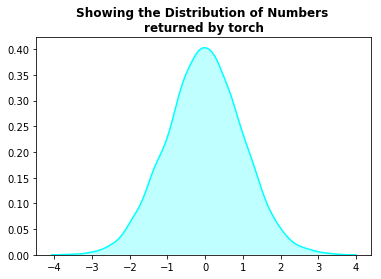

In [190]:
t = (torch.randn(784,10).cuda())
g = []
for k in t:
    l = k.tolist()
    for m in l:
        g.append(m)
sns.kdeplot(g,shade = True,color = "cyan")
plt.title("Showing the Distribution of Numbers \nreturned by torch",fontweight='bold')

In [191]:
class LogReg(nn.Module):
    def __init__(self): 
        super().__init__()
        self.l1_weights = getweights(28*28,10)
        self.l1_bias = getweights(10)
    
    def forward(self,x):
        x = x.view(x.size(0),-1)
        x = torch.matmul(x,self.l1_weights) + self.l1_bias # affine transformation
        x = torch.log(torch.exp(x)/torch.exp(x).sum(dim=0)) # log soft max
        return x

In [192]:
net2 = LogReg().cuda()
opt = optim.Adam(net2.parameters())


In [193]:
fit(net2,md,n_epochs = 5, crit = loss, opt = opt,metrics = metric)

epoch      trn_loss   val_loss   accuracy   
    0      2.450639   2.406592   0.9094    
    1      2.451624   2.393673   0.9099    
    2      2.428702   2.393861   0.9125    
    3      2.43216    2.394138   0.9112    
    4      2.428052   2.395899   0.9093    



[array([2.3959]), 0.9093]